In [104]:
import networkx as nx
import warnings
import datetime
import seaborn as sn
sn.set()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import math
%matplotlib inline
warnings.filterwarnings('ignore')

In [16]:
def plotdistribution(filename):
    with open(filename) as handle:
        distdict = json.loads(handle.read())
    
    newdict = {k: v[0] for k, v in distdict.items()}
    df = pd.DataFrame.from_dict(newdict, orient = 'index')
    df = df.reset_index()
    df = df.sort_values(by = 'index', ascending = True)
    df.plot(kind = 'bar', x = 'index', y = 0, figsize = [10,7], color='#e8612c')
    plt.title('Passengers per hour', fontsize=10)
    plt.xlabel('Hours', fontsize=10)
    plt.ylabel('Passengers', fontsize=10)
    return plt.show()

In [70]:
with open('../Data/dicts/o_ma.json') as handle:
    distdictma = json.loads(handle.read())
with open('../Data/dicts/o_di.json') as handle:
    distdictdi = json.loads(handle.read())
with open('../Data/dicts/o_wo.json') as handle:
    distdictwo = json.loads(handle.read())
with open('../Data/dicts/o_do.json') as handle:
    distdictdo = json.loads(handle.read())
with open('../Data/dicts/o_vr.json') as handle:
    distdictvr = json.loads(handle.read())
with open('../Data/dicts/o_za.json') as handle:
    distdictza = json.loads(handle.read())
with open('../Data/dicts/o_zo.json') as handle:
    distdictzo = json.loads(handle.read())

newdictma = {k: v[0] for k, v in distdictma.items()}
newdictdi = {k: v[0] for k, v in distdictdi.items()}
newdictwo = {k: v[0] for k, v in distdictwo.items()}
newdictdo = {k: v[0] for k, v in distdictdo.items()}
newdictvr = {k: v[0] for k, v in distdictvr.items()}
newdictza = {k: v[0] for k, v in distdictza.items()}
newdictzo = {k: v[0] for k, v in distdictzo.items()}

dfma = pd.DataFrame.from_dict(newdictma, orient = 'index')
dfma = dfma.reset_index()
dfma = dfma.sort_values(by = 'index', ascending = True)
dfma = dfma[dfma['index'] >= '06']

dfdi = pd.DataFrame.from_dict(newdictdi, orient = 'index')
dfdi = dfdi.reset_index()
dfdi = dfdi.sort_values(by = 'index', ascending = True)
dfdi = dfdi[dfdi['index'] >= '06']

dfwo = pd.DataFrame.from_dict(newdictwo, orient = 'index')
dfwo = dfwo.reset_index()
dfwo = dfwo.sort_values(by = 'index', ascending = True)
dfwo = dfwo[dfwo['index'] >= '06']

dfdo = pd.DataFrame.from_dict(newdictdo, orient = 'index')
dfdo = dfdo.reset_index()
dfdo = dfdo.sort_values(by = 'index', ascending = True)
dfdo = dfdo[dfdo['index'] >= '06']

dfvr = pd.DataFrame.from_dict(newdictvr, orient = 'index')
dfvr = dfvr.reset_index()
dfvr = dfvr.sort_values(by = 'index', ascending = True)
dfvr = dfvr[dfvr['index'] >= '06']

dfza = pd.DataFrame.from_dict(newdictza, orient = 'index')
dfza = dfza.reset_index()
dfza = dfza.sort_values(by = 'index', ascending = True)
dfza = dfza[dfza['index'] >= '06']

dfzo = pd.DataFrame.from_dict(newdictzo, orient = 'index')
dfzo = dfzo.reset_index()
dfzo = dfzo.sort_values(by = 'index', ascending = True)
dfzo = dfzo[dfzo['index'] >= '06']


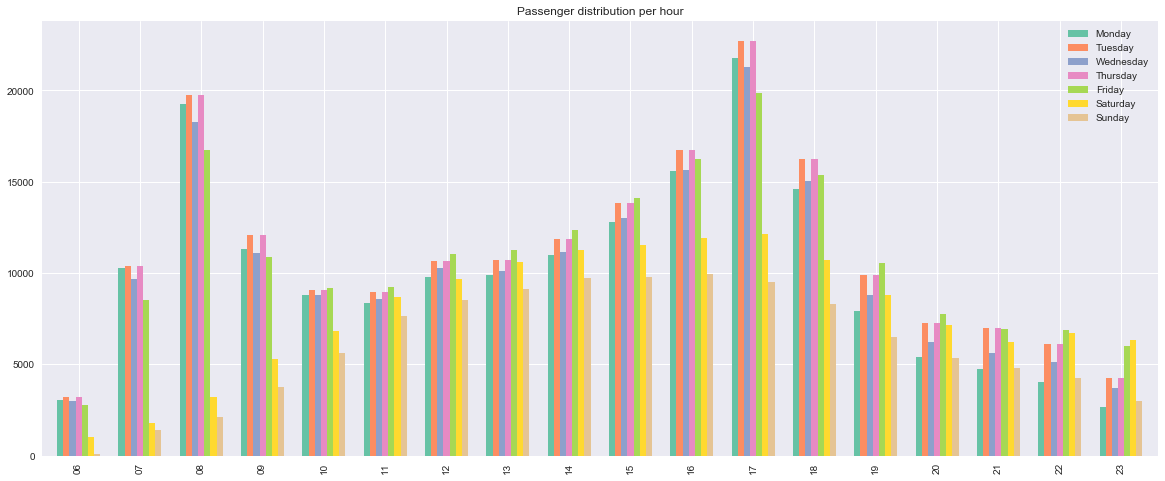

In [178]:
index = dfma['index'].tolist()

df = pd.DataFrame({'Monday': dfma[0].tolist(),
                  'Tuesday': dfdo[0].tolist(),
                  'Wednesday': dfwo[0].tolist(),
                  'Thursday': dfdo[0].tolist(),
                  'Friday': dfvr[0].tolist(),
                  'Saturday': dfza[0].tolist(),
                  'Sunday': dfzo[0].tolist()}, index=index)

plot = df.plot.bar(figsize = [20,8], colors = sn.color_palette("Set2", 7), width = 0.7, title = 'Passenger distribution per hour')
plot.figure.savefig("distribution.png")

In [106]:
def cossim(vec1,vec2):
        sum11, sum12, sum22 = 0, 0, 0
        for i in range(len(vec1)):
            x = vec1[i]; y = vec2[i]
            sum11 += x*x
            sum22 += y*y
            sum12 += x*y
        return sum12/math.sqrt(sum11*sum22)

In [147]:
def cosine_similarity(filename1, filename2):
    with open(filename1) as handle:
        distdict1 = json.loads(handle.read())
    
    with open(filename2) as handle:
        distdict2 = json.loads(handle.read())
        
    newdict1 = {k: v[0] for k, v in distdict1.items()}
    df1 = pd.DataFrame.from_dict(newdict1, orient = 'index')
    df1 = df1.reset_index()
    df1 = df1.sort_values(by = 'index', ascending = True)
    df1 = df1[df1['index'] >= '06']
    
    newdict2 = {k: v[0] for k, v in distdict2.items()}
    df2 = pd.DataFrame.from_dict(newdict2, orient = 'index')
    df2 = df2.reset_index()
    df2 = df2.sort_values(by = 'index', ascending = True)
    df2 = df2[df2['index'] >= '06']

    return cossim(df1[0].tolist(), df2[0].tolist())


In [169]:
cosine_similarity('../Data/dicts/d_za.json', '../Data/dicts/d_zo.json')



0.9946451776456643

In [100]:
import pickle
with open('../Data/cossim_origin.pkl', 'rb') as handle:
    b = pickle.load(handle)
    
b

{('maandag', 'dinsdag'): [('07', 0.9998571618963445),
  ('11', 0.9995407543288469),
  ('19', 0.9994291129425225),
  ('01', 0.5073667151586374),
  ('08', 0.9999252679656304),
  ('17', 0.9997497666491182),
  ('06', 0.999707221568758),
  ('05', 0.9983721494842626),
  ('12', 0.9994705739970802),
  ('20', 0.9984232557592226),
  ('15', 0.9992378958885868),
  ('03', 0.5790772836100141),
  ('10', 0.9995277874395923),
  ('02', 0.5640734518784073),
  ('23', 0.995313675485313),
  ('16', 0.9989167875473879),
  ('22', 0.9982872593382178),
  ('18', 0.9997106253478206),
  ('21', 0.9984574020369296),
  ('14', 0.999206972672595),
  ('13', 0.999235643903249),
  ('04', 0.40028228147759926),
  ('00', 0.9977667305119275),
  ('09', 0.9992142434370129)],
 ('maandag', 'woensdag'): [('07', 0.9997281324261984),
  ('11', 0.9988729911525703),
  ('19', 0.9980329053382706),
  ('01', 0.9950027627132928),
  ('08', 0.9997158307264493),
  ('17', 0.9991819877828401),
  ('06', 0.998692730272031),
  ('05', 0.9965253078881